# **8. Neural Networks and Deep Learning**

This week, we'll learn about neural nets and build a model for classifying images of clothes



## **8.10 Data augmentation** (video 10)

* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

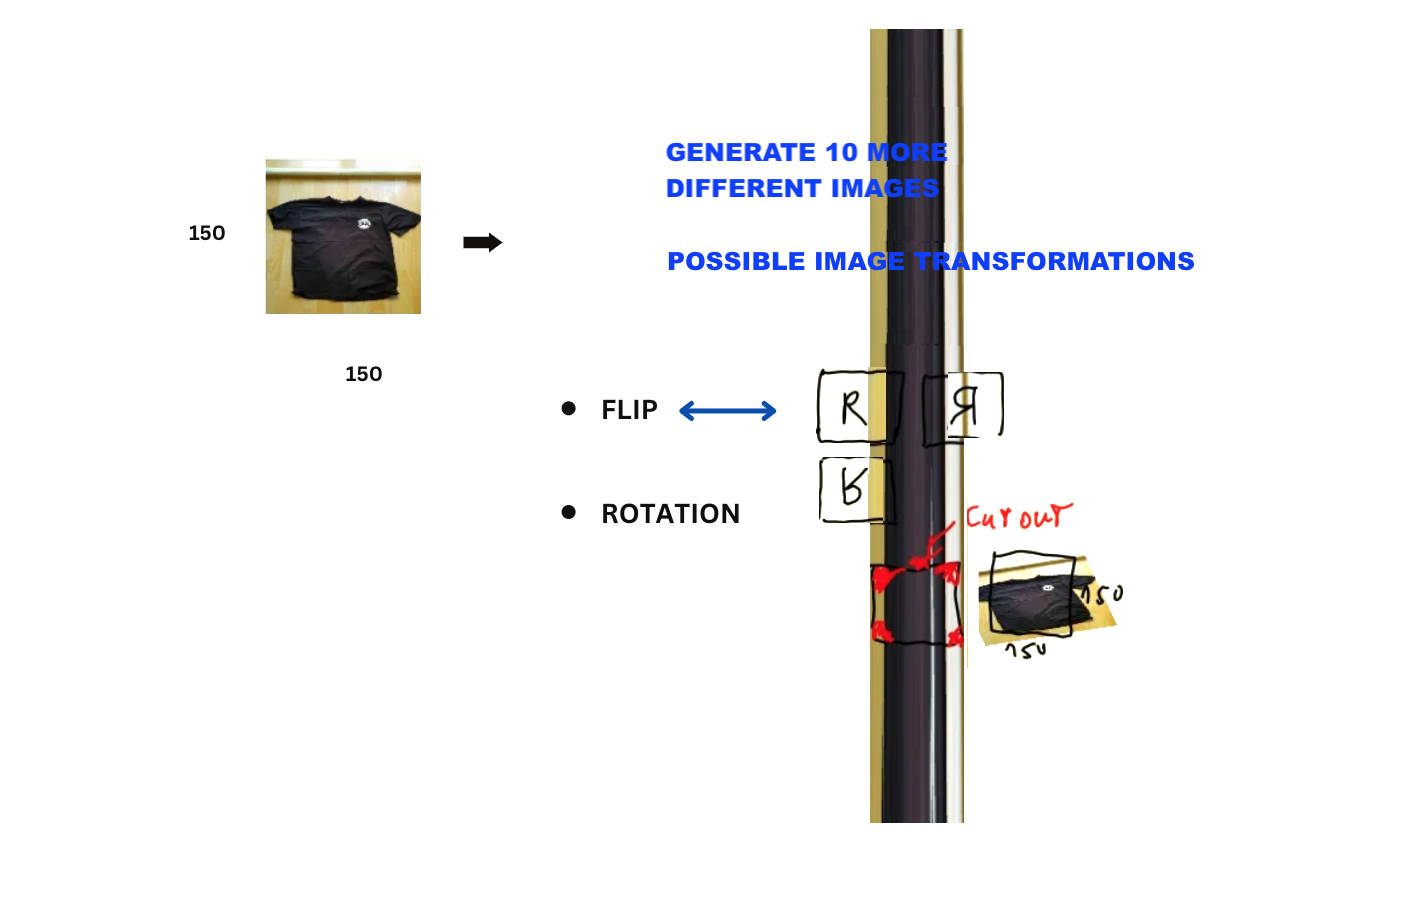

* Generate 10 more different images so then the neural network will not see exactly the same image everytime actually there are many many different things that we can do to generate more images fro existing ones there are simple image transformations that we can use to generate more data first of all let's say we have this image and we want to generate more pictures from this there is one simple thing that we can do is we can just take this image and flip it so this is our image transformation first thing we can do is we can just take an image and flip it horizontally and vertically I will not use the t-shirt here because I cannot flip it in this up I will just draw it so let's say we have a letter R so what we can do is we can flip it will be sort of like mirroring R  this would be I don't remember if it's a vertical flip or horizontal flip but we take this image and flip it then we can flip also along this dimension this would be I guess horizontal flip not sure but then our R will be upside down that would be a different way of flipping I have some code for generating these transformations.


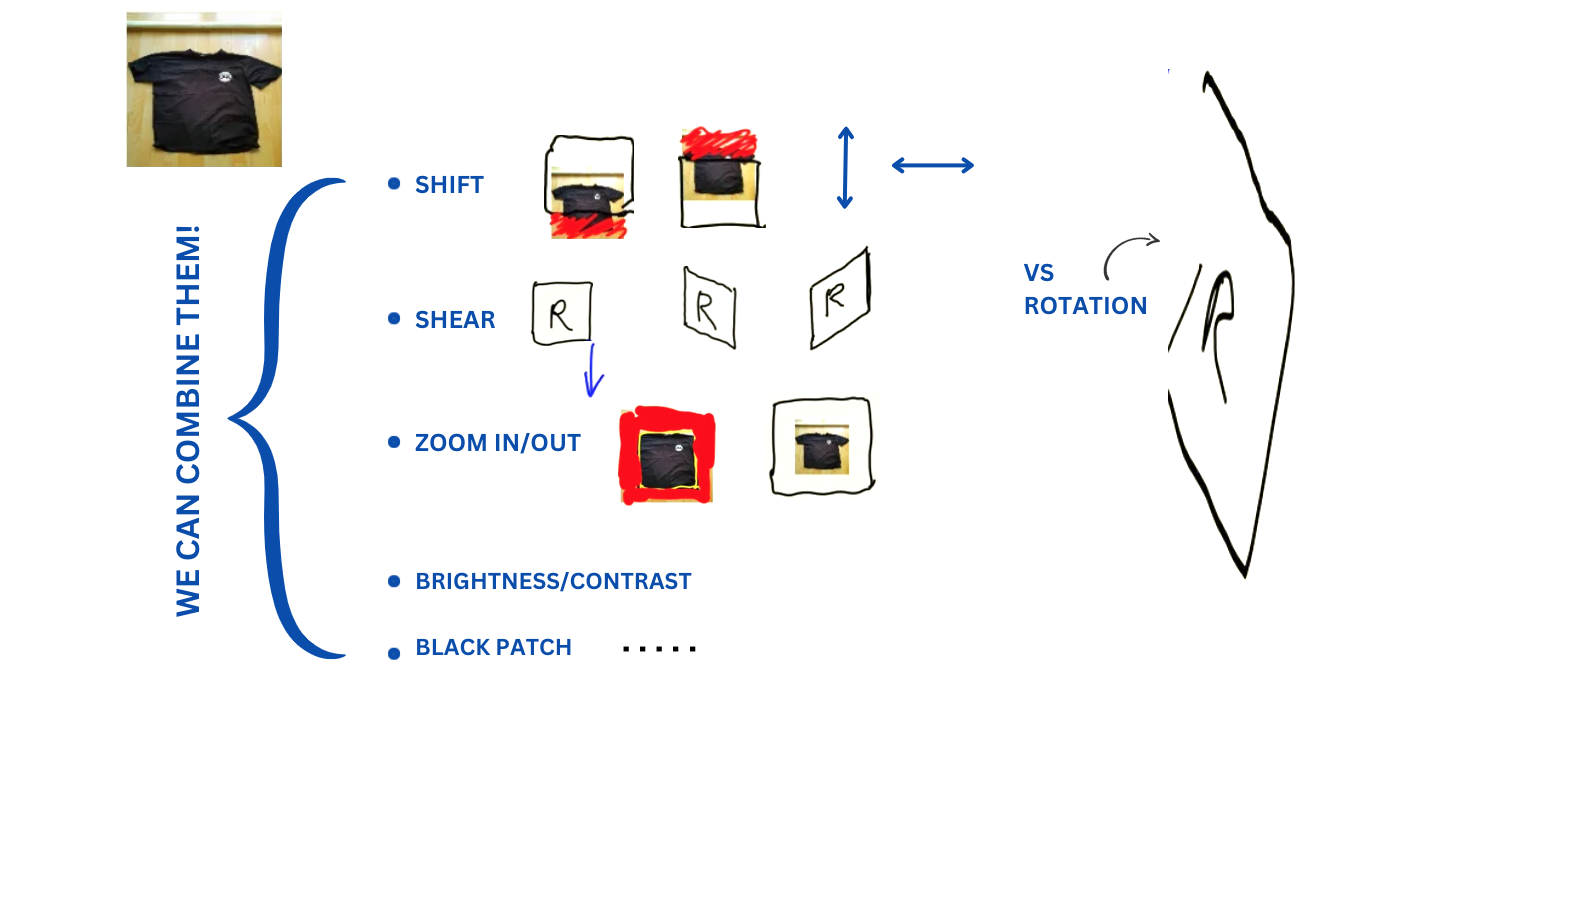

* Next transformation is rotation we take our image and we rotate it so we can rotate it clockwise or counterclockwise so our image still has to be squared so this would be our image so we will need to cut out all these parts we remove and somehow need to fill these parts so it still looks like an image and the same happens here we kind of lose a part of the image but it still stays 150 by 150 so the original one let's say it's also 150 by 150 but we rotate it actually in the dataset that we have some of the images are not always positioned perfectly so sometimes there are slight variations slight rotations so maybe for our dataset it makes sense to generate an image like that in Keras.
* We can shift so again and the transformation we can make is shifting it a bit up or down or left and right as well.
* The image here we cut this part or red color in drawing this part and whatever is left we use is our image that we fit with the neural network we can move things horizontally or we can move things vertically.

In [ ]:
import numpy as np
import pandas as pd

from PIL import Image

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
%matplotlib inline

Let's create some helper functions for doing the augmentations


In [ ]:
def apply_transform(x, transform_parameters):
    x = tf.keras.preprocessing.image.apply_affine_transform(x,
        transform_parameters.get('theta', 0),
        transform_parameters.get('tx', 0),
        transform_parameters.get('ty', 0),
        transform_parameters.get('shear', 0),
        transform_parameters.get('zx', 1),
        transform_parameters.get('zy', 1),
        row_axis=0,
        col_axis=1,
        channel_axis=2,
        fill_mode='nearest',
        cval=0.0,
        order=1
    )

    if transform_parameters.get('flip_horizontal', False):
        x = x[::-1, :, :]

    if transform_parameters.get('flip_vertical', False):
        x = x[:, ::-1, :]

    return x

In [ ]:
def augment(img, 
            rotation=0,
            height_shift=0,
            width_shift=0,
            shear=0,
            zoom_x=1,
            zoom_y=1,
            flip_horizontal=0,
            flip_vertical=0):

    x = np.array(img)

    transform_parameters = {
        'theta': rotation,
        'tx': height_shift,
        'ty': width_shift,
        'shear': shear,
        'zx': zoom_x,
        'zy': zoom_y,
        'flip_horizontal': flip_horizontal,
        'flip_vertical': flip_vertical,
    }
    
    xaug = apply_transform(x, transform_parameters)
    imgaug = Image.fromarray(xaug)
    return imgaug

In [ ]:
def show_augmentations(param, values, figsize=(20, 6)):
    imgs = []

    for v in values:
        im = augment(tshirt, **{param: v})
        imgs.append(im)

    plt.figure(figsize=figsize)

    n = len(values)

    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(np.array(imgs[i]))
        plt.title('%s=%s' % (param, values[i]))
        plt.axis("off")

    plt.show()    

Now we let's load an image

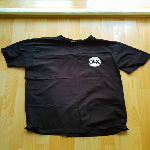

In [ ]:
tshirt = Image.open('./clothing-dataset-small/train/t-shirt/5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg')
tshirt = tshirt.resize((150, 150), resample=Image.NEAREST)
tshirt

Now let's check different augmentations

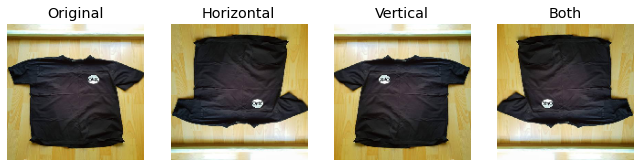

In [ ]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 4, 1)
plt.imshow(np.array(tshirt))
plt.title('Original')
plt.axis("off")


plt.subplot(1, 4, 2)

img = augment(tshirt, flip_horizontal=1)
plt.imshow(np.array(img))
plt.title('Horizontal')
plt.axis("off")


plt.subplot(1, 4, 3)

img = augment(tshirt, flip_vertical=1)
plt.imshow(np.array(img))
plt.title('Vertical')
plt.axis("off")


plt.subplot(1, 4, 4)

img = augment(tshirt, flip_horizontal=1, flip_vertical=1)
plt.imshow(np.array(img))
plt.title('Both')
plt.axis("off")

plt.show() 

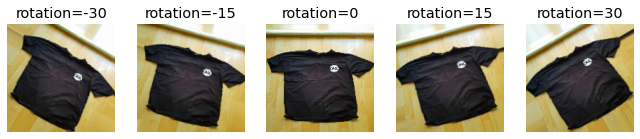

In [ ]:
param = 'rotation'
values = [-30, -15, 0, 15, 30]
show_augmentations(param, values, (10, 3))

* We can also do this rotation transformation and the parameter for this transformation is the number of degrees how much we rotate you see it can be positioned and it can be negative when it's negative we rotate counterclockwise by 30 degrees and you the actual image was like that what Keras did it took this out cut these corners away and then it made an educated guess how exactly it should preview these corners so I think it took whatever pixels were there and just kind of extended them now and the same here if counter-clockwise and when it's positive it's clockwise so here we rotate by 30 degrees as well.

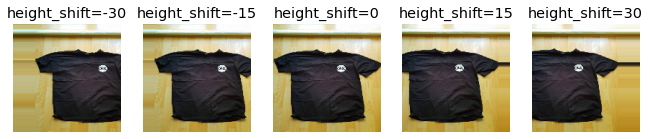

In [ ]:
param = 'height_shift'
values = [-30, -15, 0, 15, 30]
show_augmentations(param, values, (10, 3))


* Then another transformation we can do is shifting.
* This is keras and keras we specify so when we say we want to shift it like it's called height shift let's call it vertical shift basically we are moving along this dimension so when it's negative we're moving it down and then it's positive we move it up and then you see this is the image and we move it like 30 percent down we cut the part away cut it out and then here we take this line and repeat it so this parameter here height_shift =15 is like how much we put it up or down in percent and the same with width shift.

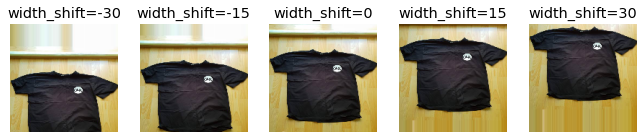

In [ ]:
param = 'width_shift'
values = [-30, -15, 0, 15, 30]
show_augmentations(param, values, (10, 3))

* The width_shift instead of moving it up or down we move it to the right when it's negative and move it to the left when it's positive, so this is shifting.

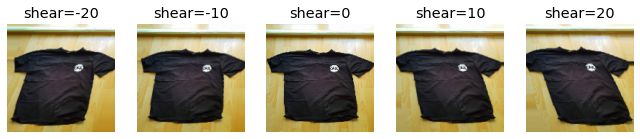

In [ ]:
param = 'shear'
values = [-20, -10, 0, 10, 20]
show_augmentations(param, values, (10, 3))

* shearing = 20, it can be positive, negative, and positive this is like either you move this corner or this down.

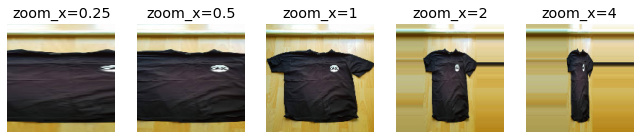

In [ ]:
param = 'zoom_x'
values = [0.25, 0.5, 1, 2, 4]
show_augmentations(param, values, (10, 3))

* You can zoom in and zoom out here we have an example that we just shrink (zoom_x= 4) this our image and we shrink it only along the (x=4) dimension so along the y dimension it's not zoomed so it stays as is but we kind of shrink if so actually you see x=one is no transformation at all x=two we should shrink it two times x=four which shrink it four times it it's below one then we are kind of pooling it the actual image is like that and we're just cutting out this and in case of when zoom is 0.24 so we're kind of pooling it for four times so the image maybe it looks like that zoom x=0.25 cut on top and bottom and we cutting this out and we're leaving only this part we can do the same for the y dimension can shrink and zoom.

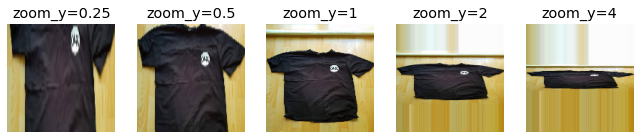

In [ ]:
param = 'zoom_y'
values = [0.25, 0.5, 1, 2, 4]
show_augmentations(param, values, (10, 3))

We don't need to implement it manually, we can use ImageDataGenerator for that

In [ ]:
vis_gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=5.0,
    height_shift_range=5.0,
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True,
)

* So we used Image data generator and it has a bunch of parameter so rotation range width, height,shear, zoom and so on we can actually just take this image data generator and use that for training our model.
* We used the image data generator and it has a bunch of parameters that we can specify to do data augmentation now, we need to specify some parameters.
* These are potential thing that we can experiment with for example if we put 30 here it means that we want to generate images that are rotated randomly the rotation degree (-30,30) is chosen in the range with between -30 and 30, there is an image and we can either rotate it by minus 30 or 30 or by 10 minus 10, 10 0, or any number between so it just selects a number randomly between  -30 and 30 and rotates by this degree then the same here for width_shift_range and height_shift_range, let's say if we put range 10 and here 10 it would use a range from minus 10 to 10 and I think this is inclusive so here for rotation it's also minus 30,30.
* Zoom range we just specify actually, it just gives one number.

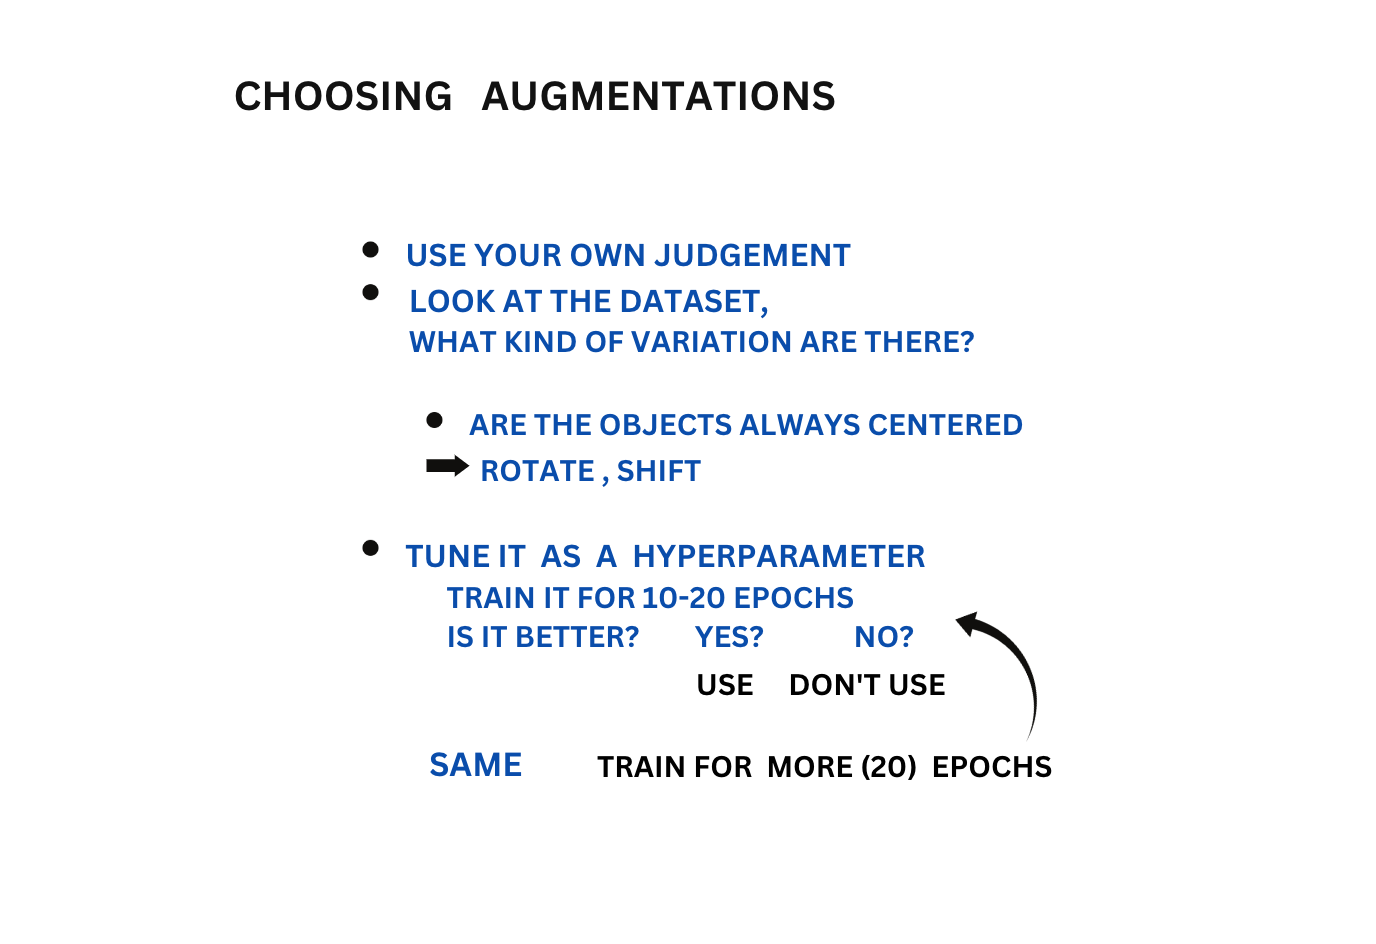

* We use our own judgment if we want to apply an augmentation does it make sense, like in our cases does horizonal flip make sense not so much because all the images we have in our data set they are always positioned correctly so we don't have image that are upside down and it's actually true for both validation and testing and this is the kind of data we expect to see in the future so let's say if we don't expect to see t-shirts turned upside down when we apply the model then we don't need to generate this kind of augmentation but vertical flip it kind of make sense because clothes usually is symmetrical like heads shoes basically everything all the clothes we use most of them to look symmetrical.

In [ ]:
x = np.array(tshirt)

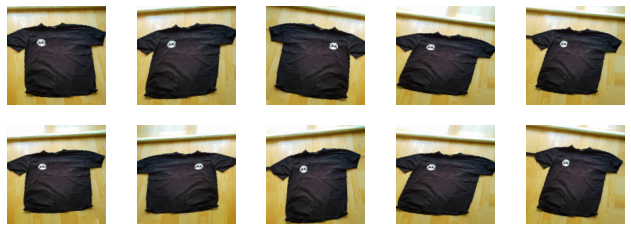

In [ ]:
plt.figure(figsize=(10, 4))

for i in range(10):
    t = vis_gen.get_random_transform((150, 150))
    xaug = vis_gen.apply_transform(x, t)

    plt.subplot(2, 5, i + 1)
    plt.imshow(xaug.astype('uint8'))
    plt.axis("off")

* Combine them, do it so you see this case it was slightly rotated so this one was rotated and flipped this one was rotated a bit this I think we applied shear transformation here 80 you see every time we get a slightly different image it's still all the same image it's stll a t-shirt and you can see that the shape of the t-shirt is almost always preserved like it's just a little bit different, and ther are many different ways how you can put a t-shirt in your floor and then take a picture it's not always ideally positioned, and here we are kin of modeling situation.

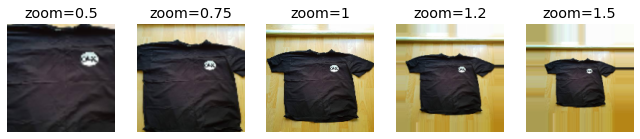

In [ ]:
values = [0.5, 0.75, 1, 1.2, 1.5]

imgs = []

for v in values:
    im = augment(tshirt, zoom_y=v, zoom_x=v)
    imgs.append(im)

plt.figure(figsize=(10, 3))

n = len(values)

for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(np.array(imgs[i]))
    plt.title('%s=%s' % ('zoom', values[i]))
    plt.axis("off")

plt.show()

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [ ]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 [==============================] - 18s 156ms/step - loss: 1.0737 - accuracy: 0.6405 - val_loss: 0.7027 - val_accuracy: 0.7801
Epoch 2/50
96/96 [==============================] - 15s 154ms/step - loss: 0.6238 - accuracy: 0.7829 - val_loss: 0.6146 - val_accuracy: 0.8065
Epoch 3/50
96/96 [==============================] - 14s 144ms/step - loss: 0.4654 - accuracy: 0.8452 - val_loss: 0.5872 - val_accuracy: 0.8270
Epoch 4/50
96/96 [==============================] - 15s 154ms/step - loss: 0.3682 - accuracy: 0.8768 - val_loss: 0.5804 - val_accuracy: 0.8123
Epoch 5/50
96/96 [==============================] - 14s 145ms/step - loss: 0.3035 - accuracy: 0.8983 - val_loss: 0.5308 - val_accuracy: 0.8182
Epoch 6/50
96/96 [==============================] - 14s 144ms/step - loss: 0.2290 - accuracy: 0.9276 - val_loss: 0.5529 - val_accuracy: 0.8270
Epoch 7/50
96/96 [==============================] - 15s 153ms/step - loss: 0.1838 - accuracy: 0.9443 - val_loss: 0.5478 - val_accuracy: 0.8328

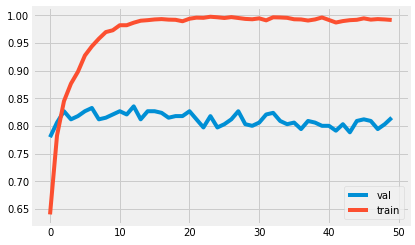

In [ ]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

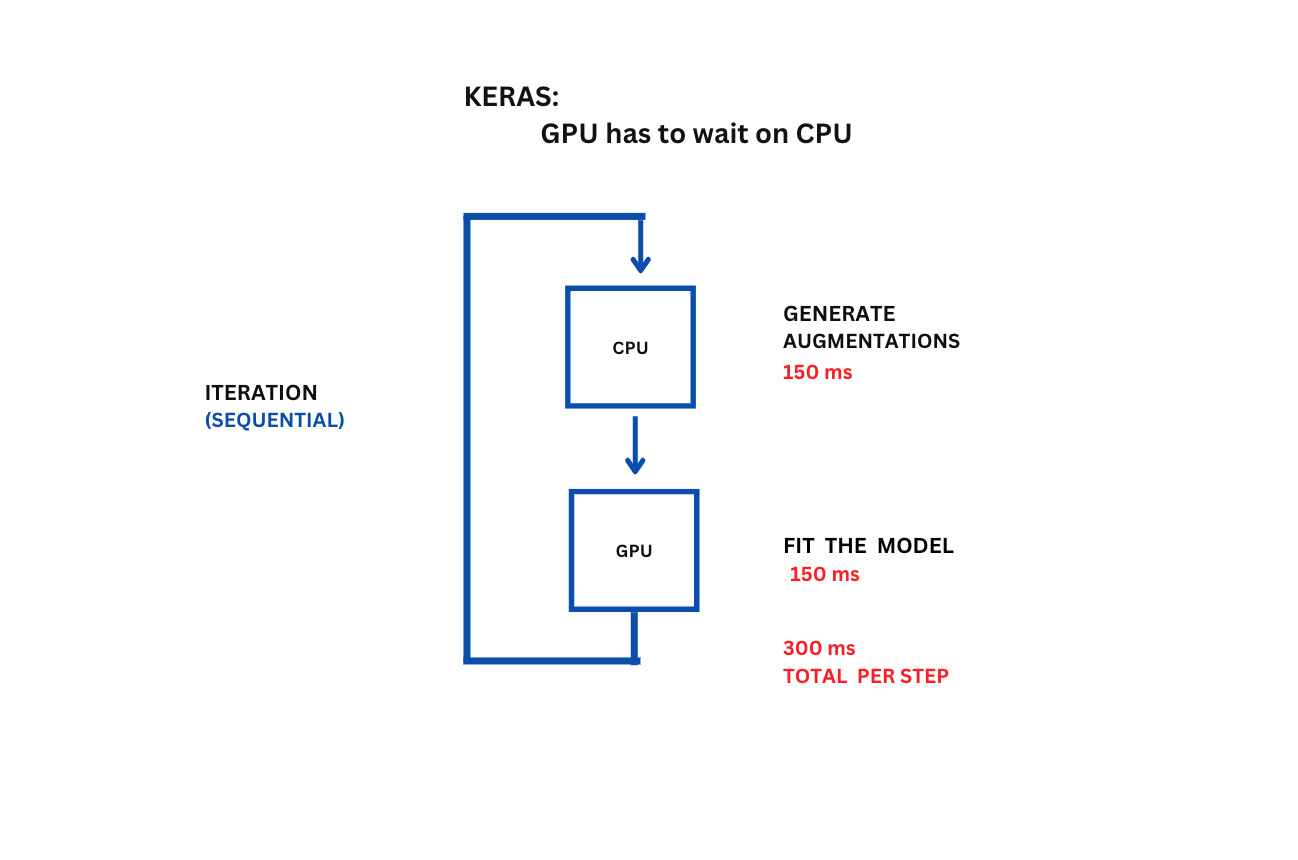

* We have a GPU and we have a CPU so what happens in the case of Keras we first use the CPU to generate augmentations and then we use GPU to fit the model and we do this set degeneration.
* Now it spends two times more so around 150 milliseconds here and 150 milliseconds here this is the reason, first of all, it's slower, and second the GPU is not utilized 100 percent.
* To avoid that there are more complex things.

## **8.11 Training a larger model** (video 11)

* Train a 299x299 model

In [ ]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [ ]:
input_size = 299

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
96/96 [==============================] - 82s 813ms/step - loss: 0.9876 - accuracy: 0.6842 - val_loss: 0.5757 - val_accuracy: 0.8328
Epoch 2/50
96/96 [==============================] - 77s 797ms/step - loss: 0.5205 - accuracy: 0.8214 - val_loss: 0.4395 - val_accuracy: 0.8592
Epoch 3/50
96/96 [==============================] - 76s 792ms/step - loss: 0.4329 - accuracy: 0.8533 - val_loss: 0.4164 - val_accuracy: 0.8592
Epoch 4/50
96/96 [==============================] - 76s 790ms/step - loss: 0.3864 - accuracy: 0.8703 - val_loss: 0.4049 - val_accuracy: 0.8651
Epoch 5/50
96/96 [==============================] - 76s 790ms/step - loss: 0.3462 - accuracy: 0.8872 - val_loss: 0.3718 - val_accuracy: 0.8651
Epoch 6/50
96/96 [==============================] - 76s 789ms/step - loss: 0.3281 - accuracy: 0.8797 - val_loss: 0.3551 - val_accuracy: 0.8886
Epoch 7/50
96/96 [==============================] - 76s 786ms/step - loss: 0.2995 - accuracy: 0.8999 - val_loss: 0.3686 - val_accuracy: 0.8798

## **8.12 Using the model** (video 12)

* Loading the model
* Evaluating the model
* Getting predictions

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [ ]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [ ]:
model = keras.models.load_model('xception_v4_1_25_0.894.h5')

In [ ]:
model.evaluate(test_ds)

12/12 [==============================] - 4s 290ms/step - loss: 0.2875 - accuracy: 0.8978


[0.28745338320732117, 0.897849440574646]

In [ ]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

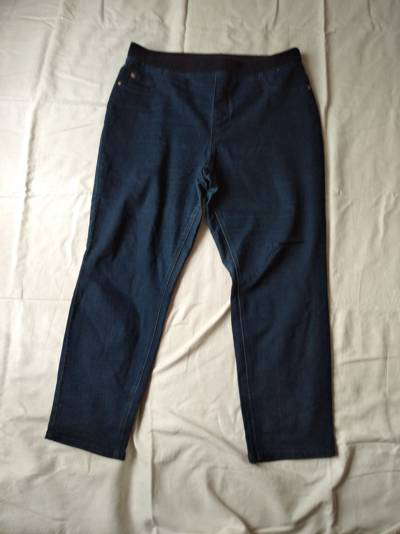

In [ ]:
load_img(path)

In [ ]:
img = load_img(path, target_size=(299, 299))

In [ ]:
import numpy as np

In [ ]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [ ]:
X = preprocess_input(X)

In [ ]:
pred = model.predict(X)

1/1 [==============================] - 1s 677ms/step


In [ ]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [ ]:
dict(zip(classes, pred[0]))

{'dress': -2.7085006,
 'hat': -4.8741436,
 'longsleeve': -0.18174297,
 'outwear': -0.91185373,
 'pants': 12.414254,
 'shirt': -2.3922973,
 'shoes': -4.0853906,
 'shorts': 5.673141,
 'skirt': -2.3492818,
 't-shirt': -1.5643936}

## **8.13 Summary**

* We can use pre-trained models for general image classification
* Convolutional layers let us turn an image into a vector
* Dense layers use the vector to make the predictions
* Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
* First, train a small model (150x150) before training a big one (299x299)
* Learning rate - how fast the model trians. Fast learners aren't always best ones
* We can save the best model using callbacks and checkpointing
* To avoid overfitting, use dropout and augmentation

## **8.14 Explore more**

* Add more data, e.g. Zalando, etc (ADD LINKS)
* Albumentations - another way of generating augmentations
* Use PyTorch or MXNet instead of TensorFlow/Keras
* In addition to Xception, there are others architectures - try them

Other projects:

* cats vs dogs
* Hotdog vs not hotdog
* Category of images